# pre-processing

In [2]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data
file_path = r"titanic_train.csv"
data = pd.read_csv(file_path)
#complete missing age with median
data['Age'].fillna(data['Age'].median(), inplace = True)

#complete missing fare with median
data['Fare'].fillna(data['Fare'].median(), inplace = True)

#complete embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

#complete Cabin with mode
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace = True)

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data['IsAlone'] = 1 #initialize to yes/1 is alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0

def my_regex(x):
    try:
        num = re.search(r'[0-9]+',x)
        return num.group(0)
    except:
        return 0
    return 

data['Cabin Num'] = data.Cabin.apply(lambda x : my_regex(x))    
#data.head()  

x = data[['Cabin Num','IsAlone','FamilySize','Parch','SibSp','Age','Fare']]

y = data.Survived

# Steps of clustering research

# KMeans

## KMeans scaling

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
pca_scaler = PCA(n_components=4)

standard_scaler.fit(x)
minmax_scaler.fit(x)
pca_scaler.fit(x)

standard_x = standard_scaler.transform(x)
minmax_x = minmax_scaler.transform(x)
pca_x = pca_scaler.transform(x)

C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\zigi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


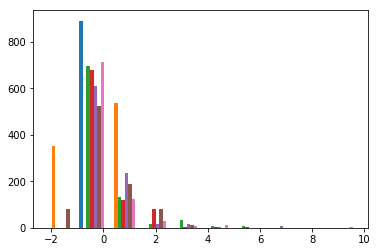

In [4]:
plt.hist(standard_x)
plt.show()

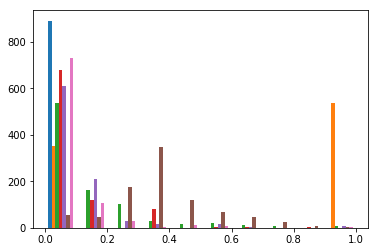

In [5]:
plt.hist(minmax_x)
plt.show()

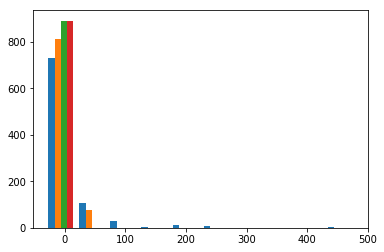

In [6]:
plt.hist(pca_x)
plt.show()

## KMeans - choose the number of cluster - Elbow method 

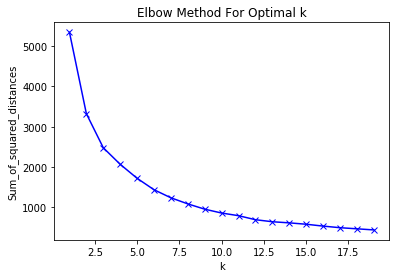

In [9]:
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(standard_x)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

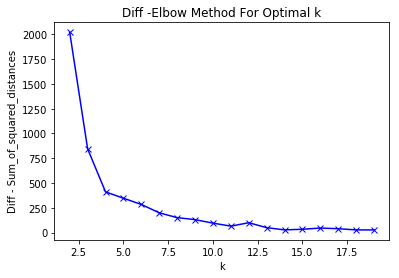

In [10]:
Diff_Sum_of_squared_distances = pd.Series(Sum_of_squared_distances)
Diff_Sum_of_squared_distances = Diff_Sum_of_squared_distances.diff().abs()#.diff().abs()
Diff_Sum_of_squared_distances.dropna(inplace=True)


plt.plot(K[1:], Diff_Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Diff - Sum_of_squared_distances')
plt.title('Diff -Elbow Method For Optimal k')
plt.show()

#Diff_Sum_of_squared_distances

## KMeans - make cluster

In [46]:
km = KMeans(n_clusters=10)
km = km.fit(standard_x) #standard_x[:,[1,6]]
y_pred = km.predict(standard_x) #standard_x[:,[1,6]]
cluster_center = km.cluster_centers_

## KMeans - PAC & Checking the results

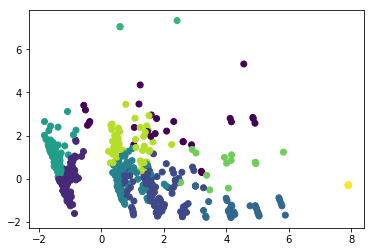

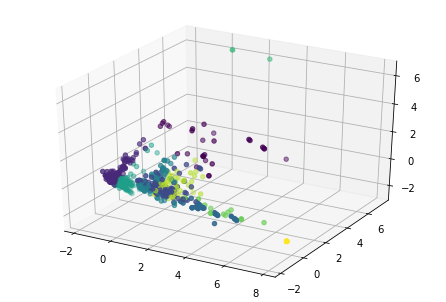

In [47]:
#check result using PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(standard_x)  
x_pca = pca.transform(standard_x)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,alpha=1)
plt.show()

pca = PCA(n_components=3)
pca.fit(standard_x)  
x_pca = pca.transform(standard_x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred)
plt.show()

In [48]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
cluster_data = pd.DataFrame(x)
cluster_data['cluster'] = y_pred

In [50]:
cluster_data.head(n=7)

,Cabin Num,IsAlone,FamilySize,Parch,SibSp,Age,Fare,cluster
0,0,0,2,0,1,22.0,7.2500,4
1,0,0,2,0,1,38.0,71.2833,4
2,0,1,1,0,0,26.0,7.9250,1
3,0,0,2,0,1,35.0,53.1000,4
4,0,1,1,0,0,35.0,8.0500,1
5,0,1,1,0,0,28.0,8.4583,1
6,0,1,1,0,0,54.0,51.8625,5


In [51]:
group_0 = cluster_data[cluster_data.cluster == 0]
group_1 = cluster_data[cluster_data.cluster == 1]
group_2 = cluster_data[cluster_data.cluster == 2]
group_3 = cluster_data[cluster_data.cluster == 3]
group_4 = cluster_data[cluster_data.cluster == 4]
group_5 = cluster_data[cluster_data.cluster == 5]
group_6 = cluster_data[cluster_data.cluster == 6]
group_7 = cluster_data[cluster_data.cluster == 7]
group_8 = cluster_data[cluster_data.cluster == 8]
group_9 = cluster_data[cluster_data.cluster == 9]

In [63]:
group_7.head()

,Cabin Num,IsAlone,FamilySize,Parch,SibSp,Age,Fare,cluster
13,0,0,7,5,1,39.0,31.2750,7
25,0,0,7,5,1,38.0,31.3875,7
86,0,0,5,3,1,16.0,34.3750,7
167,0,0,6,4,1,45.0,27.9000,7
360,0,0,6,4,1,40.0,27.9000,7


## KMeans - Feature Importance

C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of

0
1
2
3
4
5
6


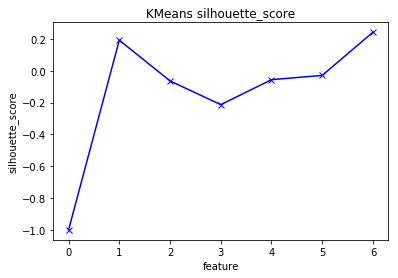

In [54]:
from sklearn.metrics import silhouette_score

silhouette_score_list = []
feature_range = range(0,standard_x.shape[1])

for i in feature_range:
    current_x = standard_x[:,i].reshape(-1, 1)
    
    km = KMeans(n_clusters=10)
    km = km.fit(current_x)
    y_pred = km.predict(current_x)
    
    if len(np.unique(y_pred)) > 1:
        dbscan_silhouette_score = silhouette_score(x,y_pred)
        silhouette_score_list.append(dbscan_silhouette_score)
    else:
        silhouette_score_list.append(-1)
    print(i)
    


plt.plot(feature_range, silhouette_score_list, 'bx-')
plt.xlabel('feature')
plt.ylabel('silhouette_score')
plt.title('KMeans silhouette_score')
plt.show()

In [55]:
x.columns

Index(['Cabin Num', 'IsAlone', 'FamilySize', 'Parch', 'SibSp', 'Age', 'Fare',
       'cluster'],
      dtype='object')

In [66]:
km = KMeans(n_clusters=10)
km = km.fit(standard_x) #standard_x[:,[1,6]]
y_pred = km.predict(standard_x) #standard_x[:,[1,6]]

dbscan_silhouette_score = silhouette_score(x,y_pred)
dbscan_silhouette_score

0.13098226060094773